<a href="https://colab.research.google.com/github/suprimashrestha/MyModels/blob/main/VGG_BASED_MODEL_%26_CAM_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from IPython.display import display, clear_output
import io
from keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization

In [1]:
!apt-get install -y git 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [2]:
!git clone https://github.com/suprimashrestha/Brain-Tumor-Classification.git

Cloning into 'Brain-Tumor-Classification'...
remote: Enumerating objects: 3056, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3056 (delta 3), reused 14 (delta 3), pack-reused 3042
Receiving objects: 100% (3056/3056), 81.08 MiB | 22.96 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [12]:
# Set up paths to the training and testing directories
train_dir = '/content/Brain-Tumor-Classification/data/MRI/Training'
test_dir = '/content/Brain-Tumor-Classification/data/MRI/Testing'

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train, val = train_test_split(train_dir, test_size=0.1,random_state=14)

In [15]:
from tqdm import tqdm

In [16]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224
for i in labels:
    folderPath = os.path.join(train_dir, i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(test_dir, i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 74/74 [00:00<00:00, 152.47it/s]


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.1,random_state=14)

In [ ]:
X_train = np.array(X_train) / 255.
X_val = np.array(X_val) / 255.
X_test = np.array(X_test) / 255.

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model and start training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_classes = 4

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,validation_split=0.1, verbose=1, batch_size = 32, validation_data = (X_val, y_val),
                     epochs = 20)

Epoch 1/20
81/81 [==============================] - 1635s 20s/step - loss: 1.3199 - accuracy: 0.3984 - val_loss: 1.2200 - val_accuracy: 0.6063
Epoch 2/20
81/81 [==============================] - 1627s 20s/step - loss: 1.1646 - accuracy: 0.5846 - val_loss: 1.0987 - val_accuracy: 0.6690
Epoch 3/20
81/81 [==============================] - 1630s 20s/step - loss: 1.0601 - accuracy: 0.6485 - val_loss: 1.0101 - val_accuracy: 0.6899
Epoch 4/20
81/81 [==============================] - 1626s 20s/step - loss: 0.9804 - accuracy: 0.6845 - val_loss: 0.9408 - val_accuracy: 0.7178
Epoch 5/20
81/81 [==============================] - 1581s 20s/step - loss: 0.9207 - accuracy: 0.7042 - val_loss: 0.8871 - val_accuracy: 0.7247
Epoch 6/20
81/81 [==============================] - 1632s 20s/step - loss: 0.8706 - accuracy: 0.7244 - val_loss: 0.8519 - val_accuracy: 0.7387
Epoch 7/20
81/81 [==============================] - 1631s 20s/step - loss: 0.8270 - accuracy: 0.7371 - val_loss: 0.8080 - val_accuracy: 0.7561

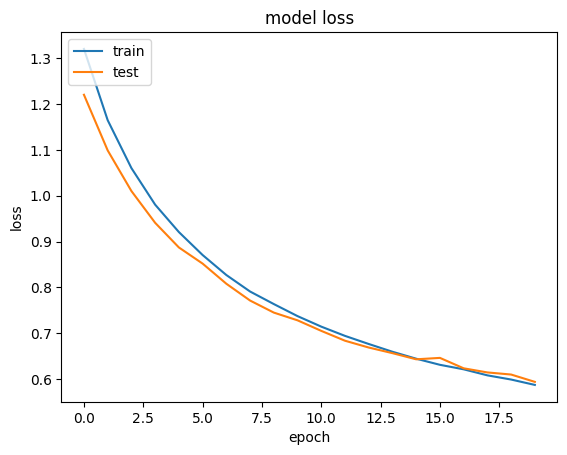

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 640x480 with 0 Axes>

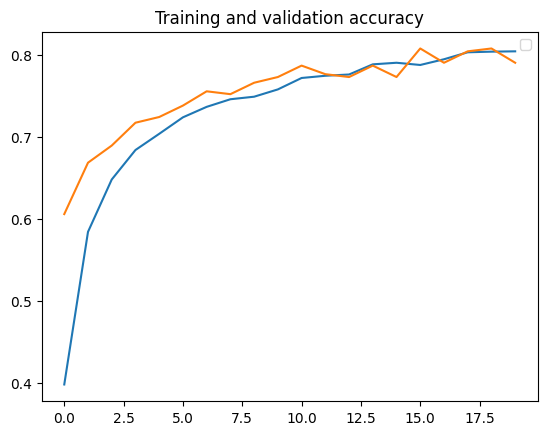

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

13/13 [==============================] - 219s 17s/step


In [ ]:
model.evaluate(X_train, y_train)

81/81 [==============================] - 1430s 18s/step - loss: 0.5801 - accuracy: 0.8080


[0.5801364183425903, 0.8079752326011658]

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.43      0.21      0.28       100
           1       0.44      0.43      0.43       115
           2       0.48      0.55      0.52       105
           3       0.54      0.82      0.65        74

    accuracy                           0.48       394
   macro avg       0.47      0.50      0.47       394
weighted avg       0.47      0.48      0.46       394



Text(0.28, 0.92, 'MRI Confusion Matrix')

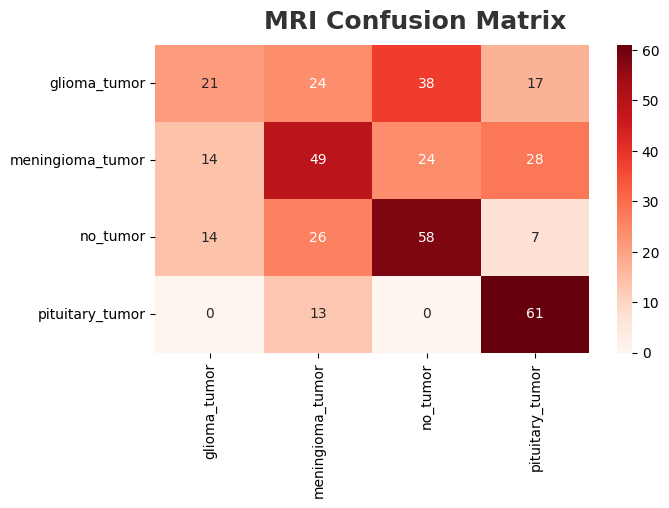

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,cmap=plt.cm.Reds)
fig.text(s='MRI Confusion Matrix',size=18,fontweight='bold',
            y=0.92,x=0.28,alpha=0.8)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Building the CAM model
gap_model = model.layers[-1].get_weights()[0]

gap_model.shape

(8, 4)

In [ ]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 batch_normalization_5 (Batc  (None, 224, 224, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 111, 111, 16)     64    

In [ ]:
def show_cam(image_value, features, results):
  # there is only one image in the batch so we index at `0`
  features_for_img = features[0]
  prediction = results[0]

  # there is only one unit in the output so we get the weights connected to it
  class_activation_weights = gap_weights[:,0]

  # upsample to the image size
  class_activation_features = sp.ndimage.zoom(features_for_img, (224/7, 224/7, 1), order=2)
  #spline interpolation of order = 2 (G search)
  
  # compute the intensity of each feature in the CAM
  cam_output  = np.dot(class_activation_features,class_activation_weights)

  # visualize the results
  print(f'sigmoid output: {results}')
 
  plt.figure(figsize=(7,7))
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_value), alpha=0.5)
  plt.show()

In [ ]:
import scipy as sp

1/1 [==============================] - 1s 1s/step
sigmoid output: [[0.31228924 0.15496276 0.48785937 0.04488869]]


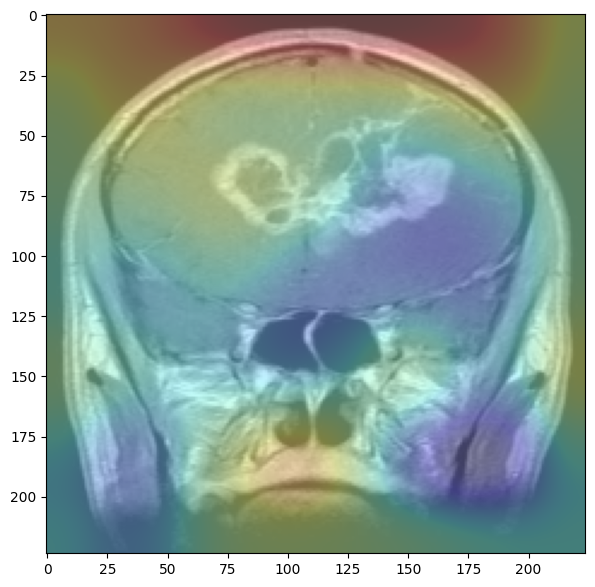

In [ ]:
# utility function to preprocess an image and show the CAM
def convert_and_classify(image):

  # load the image
  img = cv2.imread(image)

  # preprocess the image before feeding it to the model
  img = cv2.resize(img, (224,224)) / 255.0

  # add a batch dimension because the model expects it
  tensor_image = np.expand_dims(img, axis=0)

  # get the features and prediction
  features,results = cam_model.predict(tensor_image)
  
  # generate the CAM
  show_cam(tensor_image, features, results)

convert_and_classify('/content/Brain-Tumor-Classification/data/MRI/Testing/glioma_tumor/image(1).jpg')

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

13/13 [==============================] - 216s 17s/step


In [ ]:
model.evaluate(X_train, y_train)

81/81 [==============================] - 1426s 18s/step - loss: 0.5801 - accuracy: 0.8080


[0.5801364183425903, 0.8079752326011658]

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.43      0.21      0.28       100
           1       0.44      0.43      0.43       115
           2       0.48      0.55      0.52       105
           3       0.54      0.82      0.65        74

    accuracy                           0.48       394
   macro avg       0.47      0.50      0.47       394
weighted avg       0.47      0.48      0.46       394



In [ ]:
train, val = train_test_split(train_dir, test_size=0.18,random_state=14)

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Define new hyperparameters
new_learning_rate = 0.01
new_batch_size = 64
new_epochs = 10


In [ ]:
num_classes =4

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:

history = model.fit(X_train, y_train, batch_size=new_batch_size, epochs=new_epochs, validation_data=(X_val, y_val), verbose=1)

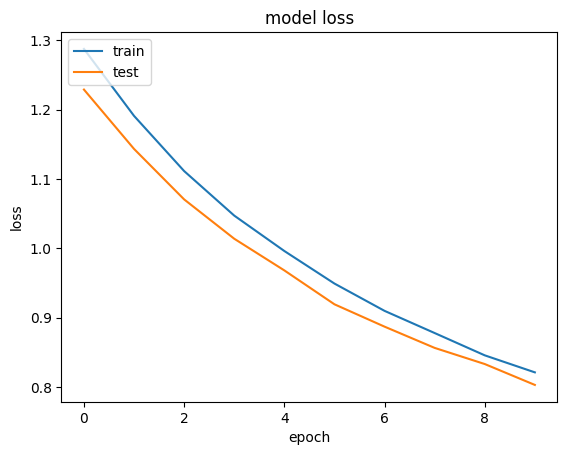

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 640x480 with 0 Axes>

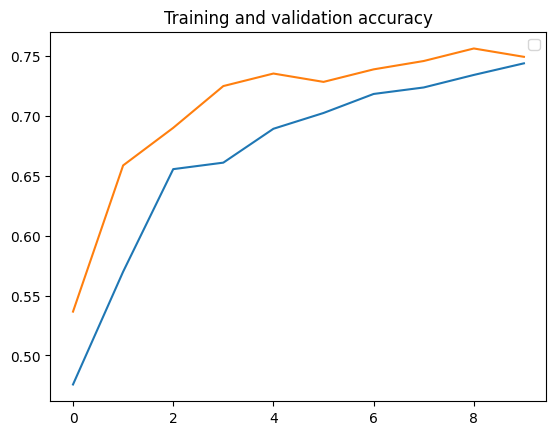

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

13/13 [==============================] - 239s 17s/step


In [ ]:
model.evaluate(X_train, y_train)

81/81 [==============================] - 1439s 18s/step - loss: 0.8062 - accuracy: 0.7491


[0.8062238097190857, 0.7491289377212524]

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.39      0.28      0.33       100
           1       0.34      0.28      0.31       115
           2       0.47      0.44      0.45       105
           3       0.49      0.86      0.62        74

    accuracy                           0.43       394
   macro avg       0.42      0.47      0.43       394
weighted avg       0.42      0.43      0.41       394



Text(0.28, 0.92, 'MRI Confusion Matrix')

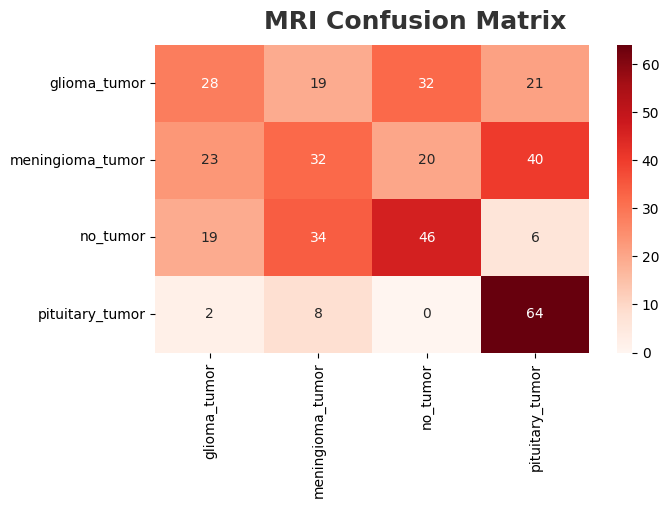

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,cmap=plt.cm.Reds)
fig.text(s='MRI Confusion Matrix',size=18,fontweight='bold',
            y=0.92,x=0.28,alpha=0.8)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

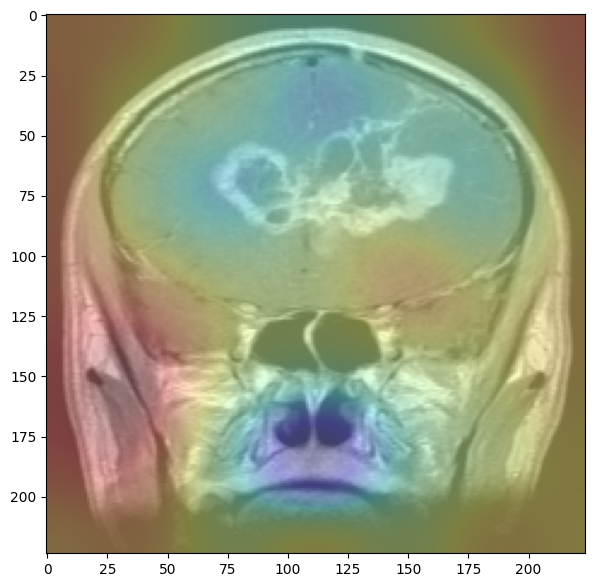

In [ ]:
import scipy as sp
#Building the CAM model
gap_model = model.layers[-1].get_weights()[0]

gap_model.shape

gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

def show_cam(image_value, features, results):
  # there is only one image in the batch so we index at `0`
  features_for_img = features[0]
  prediction = results[0]

  # there is only one unit in the output so we get the weights connected to it
  class_activation_weights = gap_weights[:,0]

  # upsample to the image size
  class_activation_features = sp.ndimage.zoom(features_for_img, (224/7, 224/7, 1), order=2)
  #spline interpolation of order = 2 (G search)
  
  # compute the intensity of each feature in the CAM
  cam_output  = np.dot(class_activation_features,class_activation_weights)

  # visualize the results
  print(f'sigmoid output: {results}')
 
  plt.figure(figsize=(7,7))
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_value), alpha=0.5)
  plt.show()
# utility function to preprocess an image and show the CAM
def convert_and_classify(image):

  # load the image
  img = cv2.imread(image)

  # preprocess the image before feeding it to the model
  img = cv2.resize(img, (224,224)) / 255.0

  # add a batch dimension because the model expects it
  tensor_image = np.expand_dims(img, axis=0)

  # get the features and prediction
  features,results = cam_model.predict(tensor_image)
  
  # generate the CAM
  show_cam(tensor_image, features, results)

convert_and_classify('/content/Brain-Tumor-Classification/data/MRI/Testing/glioma_tumor/image(1).jpg')


1/1 [==============================] - 1s 894ms/step
sigmoid output: [[0.05681969 0.13638474 0.3133993  0.49339634]]


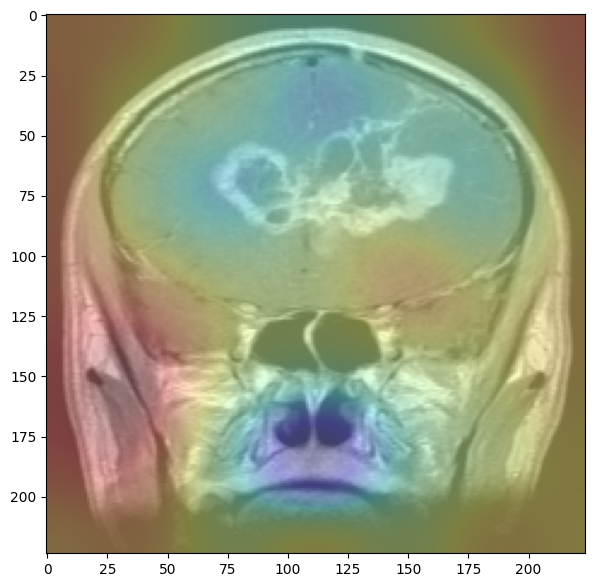

1/1 [==============================] - 0s 499ms/step
sigmoid output: [[0.05722732 0.15437143 0.28666073 0.50174046]]


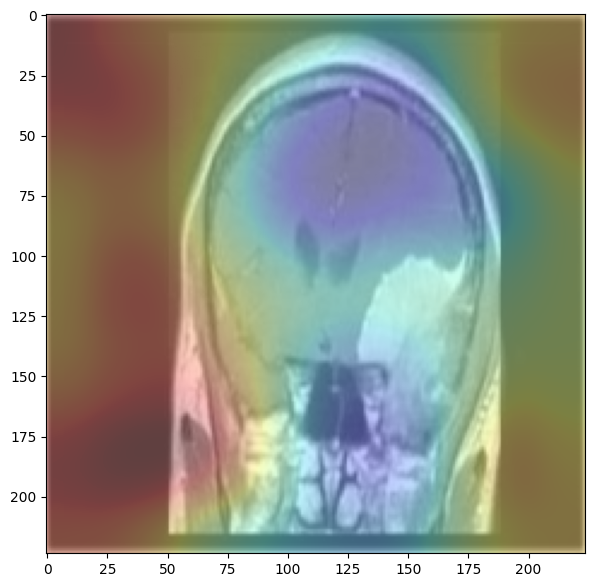

1/1 [==============================] - 1s 510ms/step
sigmoid output: [[0.07417331 0.15782613 0.38735887 0.38064176]]


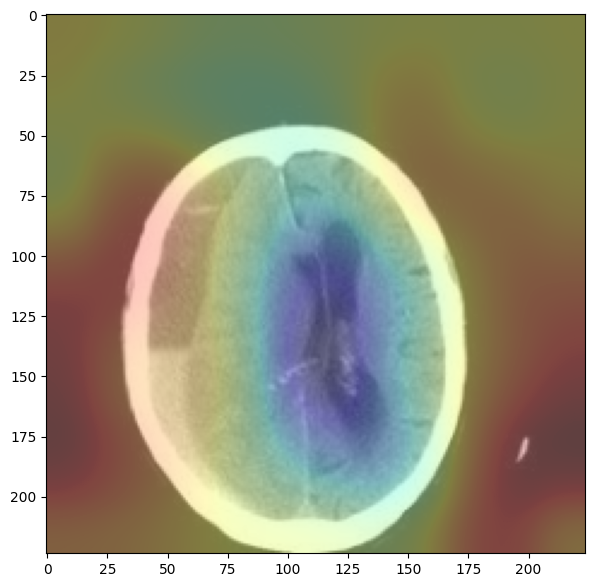

1/1 [==============================] - 1s 522ms/step
sigmoid output: [[0.05127259 0.11906453 0.32144028 0.50822264]]


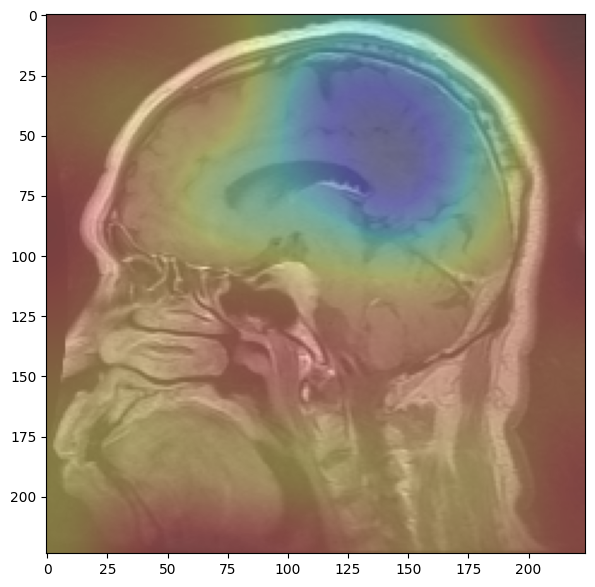

In [ ]:

convert_and_classify('/content/Brain-Tumor-Classification/data/MRI/Testing/glioma_tumor/image(1).jpg')

convert_and_classify('/content/Brain-Tumor-Classification/data/MRI/Testing/meningioma_tumor/image(1).jpg')

convert_and_classify('/content/Brain-Tumor-Classification/data/MRI/Testing/no_tumor/image(1).jpg')

convert_and_classify('/content/Brain-Tumor-Classification/data/MRI/Testing/pituitary_tumor/image(1).jpg')